# Carga de liberías

In [2]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pywt
import scipy.io.wavfile as wav

from IPython.display import Audio
from scipy import signal
from scipy.io import wavfile

# Cargar el audio original

 Sample rate: 22050


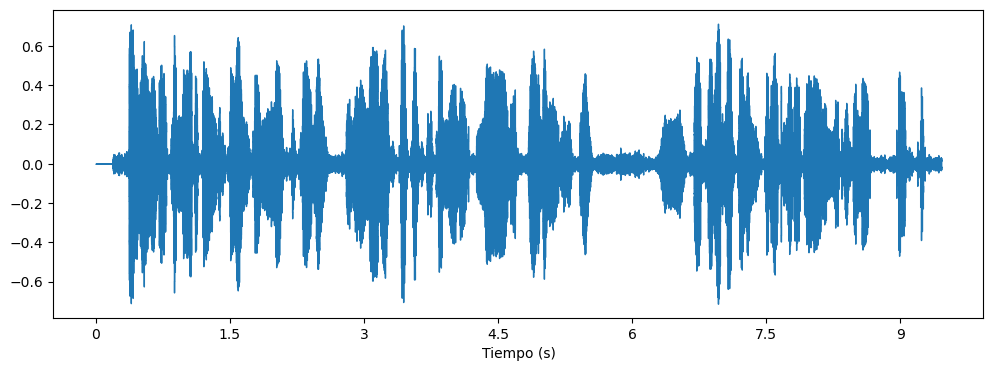

Audio original:


In [3]:
# Cargar el audio
audio_path = 'audio70_asco.wav'
audio_data, sample_rate = librosa.load(audio_path)
print(f' Sample rate: {sample_rate}')

# Visualizar la forma de onda
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.xlabel('Tiempo (s)')
plt.show()

# Escuchamos el audio
print("Audio original:")
Audio(data=audio_data, rate=sample_rate)

Normalizamos el audio antes de tratarlo

In [4]:
# Normalización del audio
audio_data_normalized = librosa.util.normalize(audio_data)

__El primer filtro__ que utilizamos el de reducción del silencio. Este, lo que hace es que multiplica cada elemento en audio_data_normalized por array de booleanos. Dado que los booleanos se interpretan como 1 para True y 0 para False en operaciones aritméticas, esta multiplicación "apaga" los valores que son menores o iguales al umbral (False en la multiplicación). 

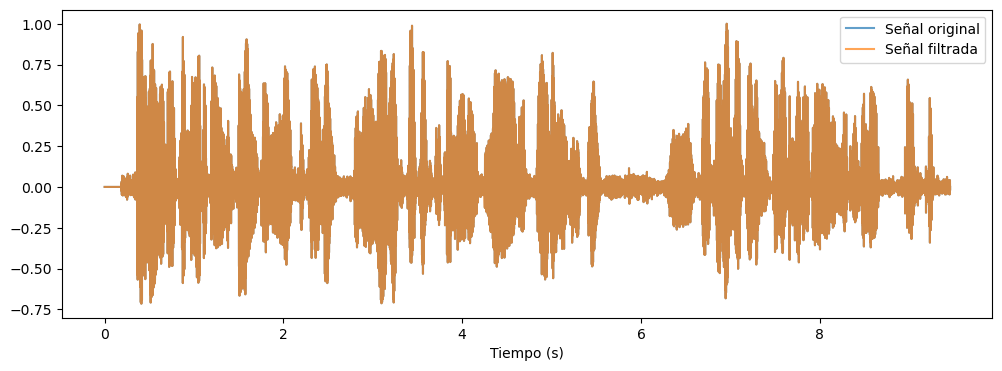

Audio filtered:


In [5]:
# Eliminación de silencio
threshold = 0.005  # Ajusta el umbral según sea necesario

audio_data_denoised = audio_data_normalized * (np.abs(audio_data_normalized) > threshold)

# Visualizar la forma de onda
x = np.array(range(0,len(audio_data)))
plt.figure(figsize=(12, 4))
plt.plot(x/sample_rate, audio_data_normalized, label = 'Señal original', alpha = 0.7)
plt.plot(x/sample_rate, audio_data_denoised, label = 'Señal filtrada', alpha = 0.7)
plt.xlabel('Tiempo (s)')
plt.legend()
plt.show()

# Guardar la señal de audio limpia en un archivo WAV
wav.write('audio70_asco_filtro_reduccion_de_silencio.wav', sample_rate, audio_data_denoised)

# Escuchamos el audio
print("Audio filtered:")
Audio(data=audio_data_denoised, rate=sample_rate)

Vemos que prácticamente, no hace ningún efecto, por lo que vamos a aumentar el threshold para que el efecto sea más notorio

Audio filtrado:


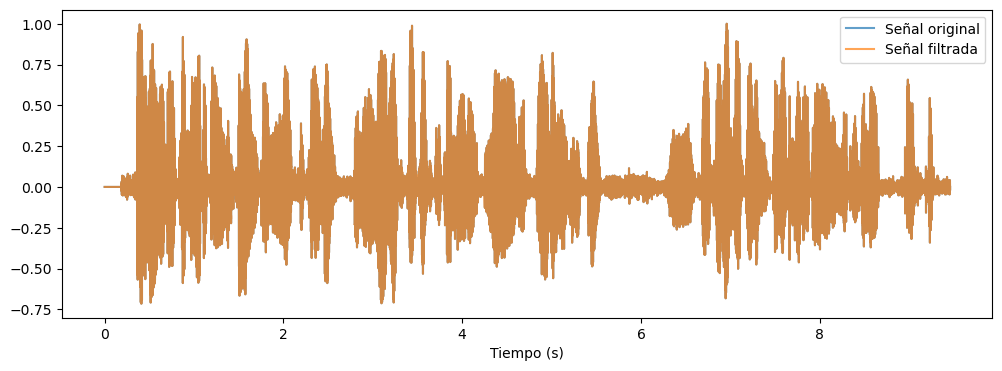

In [6]:
# Reducción de ruido
threshold = 0.015  # Ajusta el umbral según sea necesario
audio_data_denoised = audio_data_normalized * (np.abs(audio_data_normalized) > threshold)

# Escuchamos el audio
print("Audio filtrado:")
Audio(data=audio_data_denoised, rate=sample_rate)

# Visualizar la forma de onda
plt.figure(figsize=(12, 4))
x = np.array(range(0,len(audio_data_denoised)))/sample_rate
plt.plot(x, audio_data_normalized, label='Señal original', alpha=0.7)
plt.plot(x, audio_data_denoised, label='Señal filtrada', alpha=0.7)
plt.xlabel('Tiempo (s)')
plt.legend()
plt.show()

Vemos que si aumentamos el uumbral, lo único que pasa es que aumenta el ruido de fondo. Esto se debe a que como podemos ver en la siguiente imágen, hay momentos en los que habla la persona, que la amplitud pasa de ser positiva a negativa y viceversa. En estos pasos, puede suceder que la medida del micrófono de con un valor menor que el umbral, y en estos casos también se silencia esta parte del audio. Como consecuencia, aparece un ruido de fondo constante a lo largo de todo el audio.

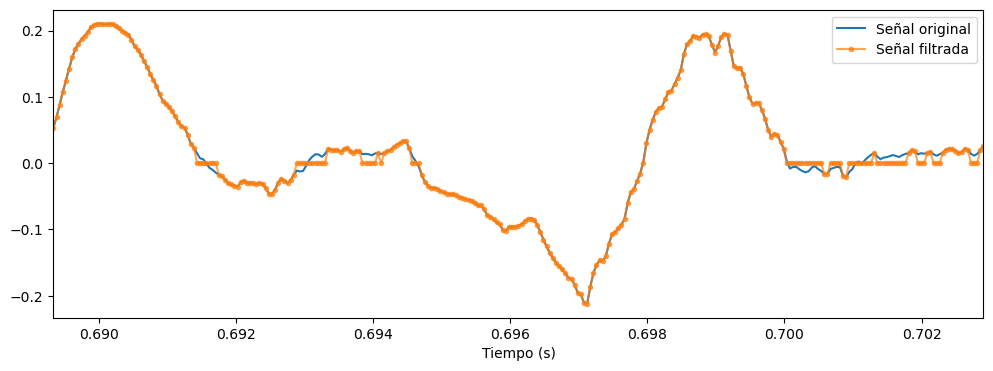

In [7]:
# Visualizar la forma de onda
a = 15200
b = 15499
x = np.linspace(a, b + 1, b-a+1)
plt.figure(figsize=(12, 4))
plt.plot(x/sample_rate, audio_data_normalized[a:b + 1], label='Señal original', alpha=1)
plt.plot(x/sample_rate, audio_data_denoised[a:b + 1], marker = 'o', markersize = 3, label='Señal filtrada', alpha=0.7)
plt.xlabel('Tiempo (s)')
plt.xlim(a/sample_rate,b/sample_rate)
plt.legend()
plt.show()

__El segundo filtro__ que hemos utilizado se trata de aplicar la Transformada de Fourier a la señal, y tratar de buscar las frecuencias en la que se presenta el ruido y eliminarlas.

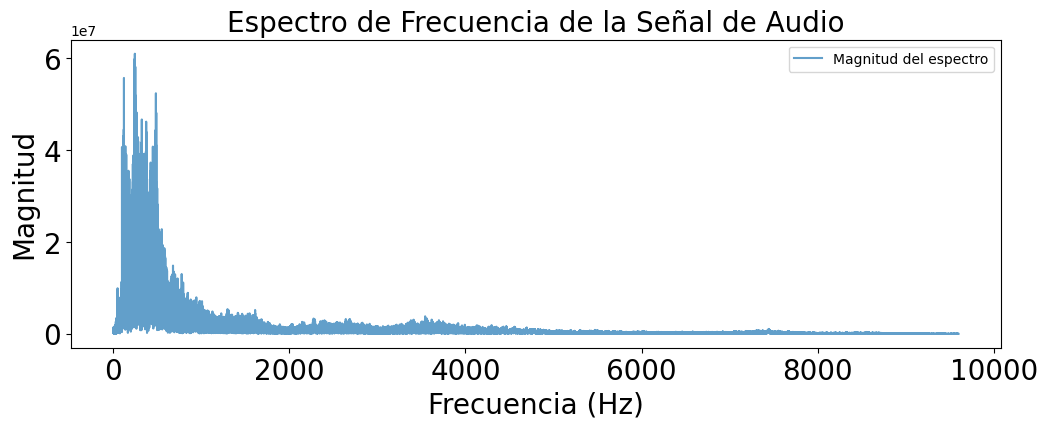

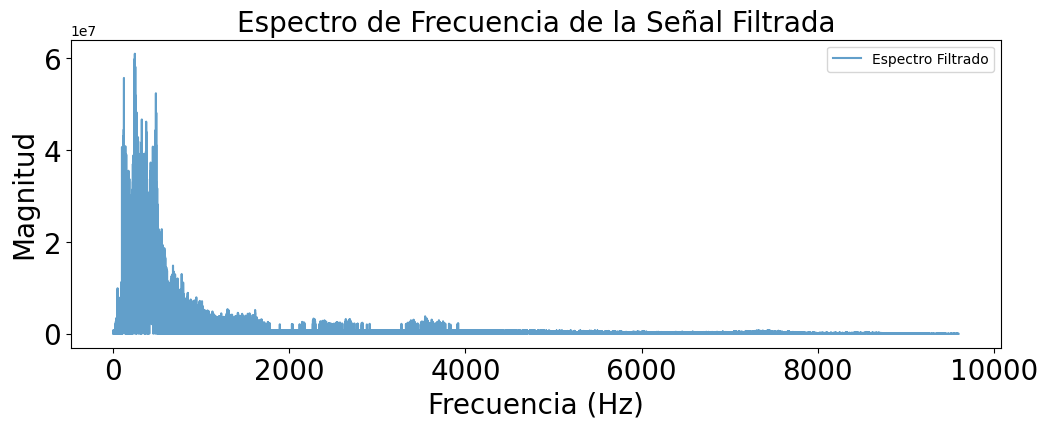

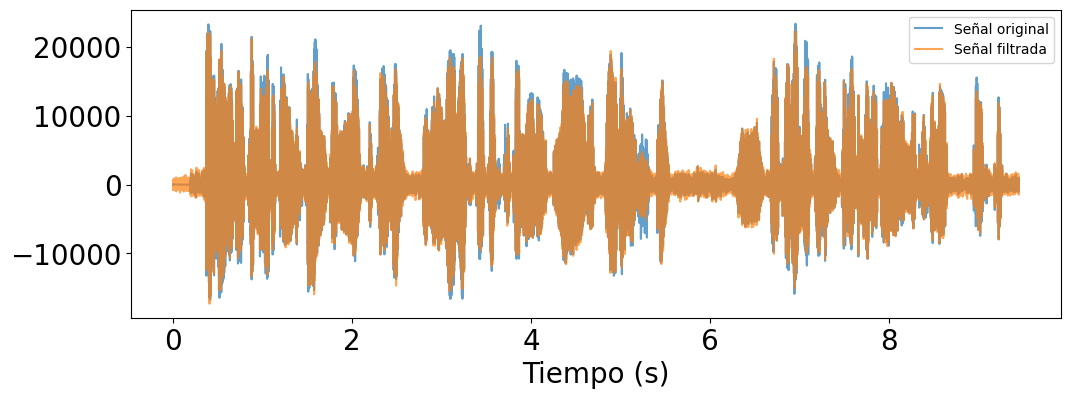

Audio filtrado por la TF:


In [8]:
# Cargar el archivo de audio
sample_rate, audio_data = wavfile.read("audio70_asco.wav")

# Calcular la transformada de Fourier de la señal de audio
fft_result = np.fft.fft(audio_data)

# Calcular el espectro de frecuencia (magnitud de la FFT)
magnitude = np.abs(fft_result)

# Crear el eje de frecuencia correspondiente
frequency_axis = np.fft.fftfreq(len(magnitude), 1 / sample_rate)

# Graficar el espectro de frecuencia
plt.figure(figsize=(12, 4))
plt.plot(frequency_axis[:90795], magnitude[:90795], label='Magnitud del espectro', alpha=0.7)
plt.title('Espectro de Frecuencia de la Señal de Audio',fontsize = 20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Frecuencia (Hz)',fontsize = 20)
plt.ylabel('Magnitud',fontsize = 20)
plt.legend()
plt.show()

# Identificar las frecuencias no deseadas que corresponden al ruido
# Puedes hacer esto inspeccionando el espectro de frecuencia y seleccionando las frecuencias que deseas eliminar

# Supongamos que deseas eliminar las frecuencias entre 500 y 2000 Hz
indicios_ruido = np.where((magnitude >= 700000)&(magnitude <= 2000000))

# Establecer esas frecuencias a cero
fft_result[indicios_ruido] = 0

plt.figure(figsize=(12, 4))
plt.plot(frequency_axis[:90795], np.abs(fft_result)[:90795], label='Espectro Filtrado', alpha=0.7)
plt.title('Espectro de Frecuencia de la Señal Filtrada',fontsize = 20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Frecuencia (Hz)',fontsize = 20)
plt.ylabel('Magnitud',fontsize = 20)
plt.legend()
plt.show()

# Realizar la transformada inversa para obtener la señal de audio filtrada
filtered_audio = np.fft.ifft(fft_result).real

x = np.array(range(0,len(audio_data)))/sample_rate
# Graficar los resultados
plt.figure(figsize=(12, 4))
plt.plot(x, audio_data, label='Señal original', alpha=0.7)
plt.plot(x, filtered_audio, label='Señal filtrada', alpha=0.7)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Tiempo (s)',fontsize = 20)
plt.legend()
plt.show()

# Guardar la señal de audio filtrada en un archivo
sample_width = audio_data.dtype.itemsize  # Obtén la anchura de muestra
wavfile.write("audio_transformada.wav", sample_rate, filtered_audio.astype(np.int16))  # Especifica la anchura de muestra

# Escuchamos el audio
print("Audio filtrado por la TF:")
Audio(data=filtered_audio, rate=sample_rate)

Tras intentar sucesivamente encontrar las frecuencias que podían eliminar el ruido, hemos concluido que este método no es adecuado.

__El tercer filtro__ que utilizamos es un filtro de Butterworth. Este filtro es capaz de bloquar las bandas que escojamos y dejar pasar las demás. En vez de hacer la transformada de Fourier, seleccionar la banda que queramos y reducirla a 0 (dejando variaciones abruptas y muy artificiales), tiene una transición gradual desde dejar las bandas intactas a eliminarlas por completo.

In [10]:
audio_data, sample_rate = librosa.load(audio_path)
# Normalización del audio
audio_data_normalized = librosa.util.normalize(audio_data)

lowcut1 = 1500  # Frecuencia de corte inferior 1
highcut1 = 3500  # Frecuencia de corte superior 1
order1 = 4  # Orden del filtro 1
sr = sample_rate

# Diseñar el filtro de rechazo de banda 1
b1, a1 = signal.butter(order1, [lowcut1, highcut1], btype='bandstop', fs=sr)

# Aplicar el filtro 1 a la señal
audio_data_filtered1 = signal.lfilter(b1, a1, audio_data_normalized)

# Definir las frecuencias de corte del filtro de rechazo de banda 2
lowcut2 = 280  # Frecuencia de corte inferior 2
highcut2 = 440  # Frecuencia de corte superior 2
order2 = 1  # Orden del filtro 2

# Diseñar el filtro de rechazo de banda 2
b2, a2 = signal.butter(order2, [lowcut2, highcut2], btype='bandstop', fs=sr)

# Aplicar el filtro 2 a la señal filtrada por el primer filtro
audio_data_filtered = signal.lfilter(b2, a2, audio_data_filtered1)

# Multiplicar las funciones de transferencia para obtener la función de transferencia total
b_total, a_total = signal.convolve(b1, b2), signal.convolve(a1, a2)

# Aplicar el filtro a la señal
audio_data_filtered = signal.lfilter(b_total, a_total, audio_data_normalized)

# Guardar la señal de audio limpia en un archivo WAV
wav.write('audio70_asco_filtro_Butterworth.wav', sample_rate, audio_data_filtered)

# Muestro el audio filtrado
print("Audio filtrado mediante Filtro de Butterworth:")
Audio(data=audio_data_filtered, rate=sample_rate)

Audio filtrado mediante Filtro de Butterworth:


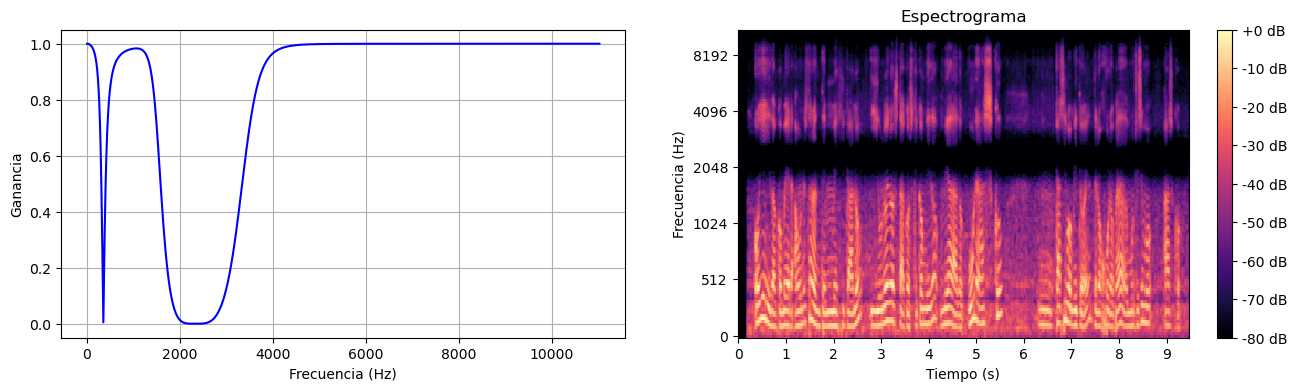

In [9]:
# Calcular el espectrograma
specgram = librosa.feature.melspectrogram(y=audio_data_filtered, sr=sample_rate, n_fft=2048, hop_length=512)

# Convertir el espectrograma a decibeles (escala logarítmica)
specgram_db = librosa.power_to_db(specgram, ref=np.max)


fig, axs = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [ 2, 2]})

w, h = signal.freqz(b_total, a_total, worN=8000)
# Graficar la función de transferencia total

x = 0.5 * sr * w / np.pi
axs[0].plot(x, np.abs(h), 'b')
axs[0].set_xlabel('Frecuencia (Hz)')
axs[0].set_ylabel('Ganancia')
axs[0].grid()

# Visualizar el espectrograma
librosa.display.specshow(specgram_db, sr=sample_rate, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
axs[1].set_title('Espectrograma')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Frecuencia (Hz)')
plt.show()

Tras escuchar el audio, vemos que el audio no se ha filtrado del todo, por lo que se ha probado un __cuarto filtro__ que utiliza la transformada wavelet.

In [10]:
# Cargar el archivo de audio WAV
sample_rate, audio_data = wav.read('audio70_asco.wav')

# Normalizar la señal de audio
audio_data = audio_data / np.max(np.abs(audio_data))

def filter_audio_cwt(audio_data, wavelet='cmor', scales=None, threshold=0.1):
    # Calcular la transformada wavelet continua (CWT)
    coefficients, _ = pywt.cwt(audio_data, scales, wavelet)

    # Aplicar umbralización a los coeficientes
    coefficients[np.abs(coefficients) < threshold] = 0

    mwf = pywt.ContinuousWavelet(wavelet).wavefun()
    y_0 = mwf[0][np.argmin(np.abs(mwf[1]))]

    r_sum = np.transpose(np.sum(np.transpose(coefficients)/ scales ** 0.5, axis=-1))
    reconstructed = r_sum * (1 / y_0)   

    return reconstructed

esc = [60, 70]
umb = [0.01, 0.02, 0.03, 0.04, 0.05]

for i in esc:
    for j in umb:
        # Definir las escalas para la CWT
        scales = np.arange(1, i)

        # Aplicar el filtro CWT
        filtered_signal = filter_audio_cwt(audio_data, wavelet='cmor', scales=scales, threshold=j)

        # Convertir la señal reconstruida a un formato adecuado para guardarla en un archivo WAV
        filtered_signal = np.int16(filtered_signal / np.max(np.abs(filtered_signal)) * 32767)

        # Guardar la señal de audio filtrada en un archivo WAV
        wav.write(f'./wavelets/audio_wavelet_{i}_{j}.wav', sample_rate, filtered_signal)

c:\Users\aitoo\anaconda3\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
C:\Users\aitoo\AppData\Local\Temp\ipykernel_18892\2402081611.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_signal = np.int16(filtered_signal / np.max(np.abs(filtered_signal)) * 32767)


Hemos descargado todos los audios que se generan en la combinación para diferentes valores de la escala y umbral definidos en el código, y los hemos escuchado todos para después escoger el que mejor ha sido filtrado según nuestro criterio.

c:\Users\aitoo\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


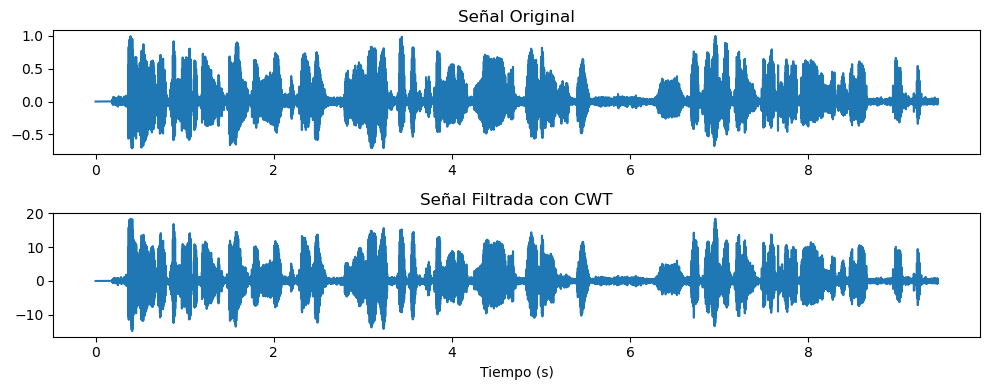

C:\Users\aitoo\AppData\Local\Temp\ipykernel_18892\2386522794.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_signal = np.int16(filtered_signal / np.max(np.abs(filtered_signal)) * 32767)


In [11]:
# Definir las escalas para la CWT
scales = np.arange(1, 70)

# Aplicar el filtro CWT
filtered_signal = filter_audio_cwt(audio_data, wavelet='cmor', scales=scales, threshold=0.01)

# Visualizar la señal original y la señal filtrada
t = np.arange(0, len(audio_data)) / sample_rate

plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, audio_data)
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.title('Señal Original')

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.xlabel('Tiempo (s)')
plt.title('Señal Filtrada con CWT')

plt.tight_layout()
plt.show()

# Convertir la señal reconstruida a un formato adecuado para guardarla en un archivo WAV
filtered_signal = np.int16(filtered_signal / np.max(np.abs(filtered_signal)) * 32767)

# Guardar la señal de audio filtrada en un archivo WAV
wav.write('./wavelets/audio_filtrado.wav', sample_rate, filtered_signal)

Tras no conseguir un audio completamente limpio con los filtros estáticos, hemos tratado de limpiarlos mediante un __quinto filtro__ adaptativo de *least mean squared*.

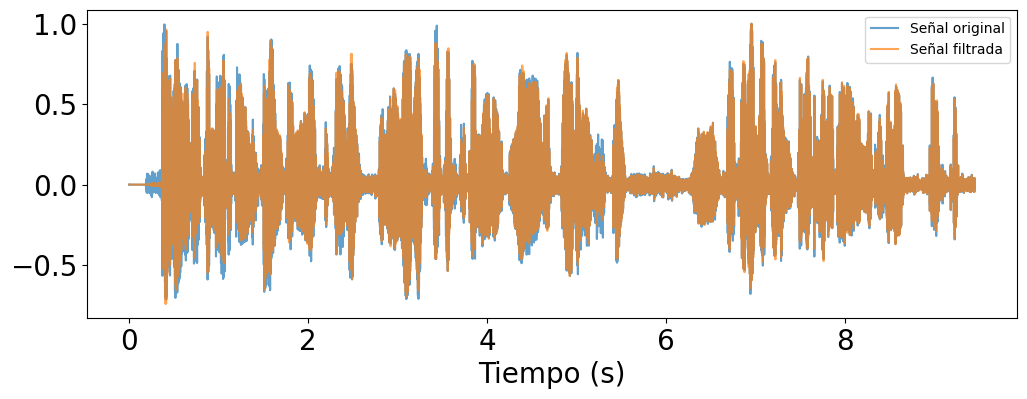

Audio filtrado mediante filtro adaptativo:


In [12]:
# Cargar el archivo de audio WAV
sample_rate, audio_data = wav.read('audio70_asco.wav')

# Verificar si el audio es estéreo
if audio_data.ndim > 1:
    # Tomar solo una de las pistas para simplificar (puedes modificar esto según tus necesidades)
    audio_data = audio_data[:, 0]

# Normalizar la señal de audio
audio_data = audio_data / np.max(np.abs(audio_data))

# Algoritmo de filtrado LMS
mu = 0.001  # Tasa de aprendizaje
filter_length = 500  # Longitud del filtro

weights = np.zeros(filter_length)  # Inicializar pesos del filtro
filtered_audio = np.zeros(len(audio_data))  # Inicializar la señal filtrada

for i in range(filter_length, len(audio_data)):
    x = audio_data[i - filter_length:i]
    y = np.dot(weights, x)
    e = audio_data[i] - y
    weights += mu * e * x
    filtered_audio[i] = y

# Escalar los datos de audio limpios al rango de valores de un archivo WAV
scaled_filtered_audio = np.int16(filtered_audio * 32767)

# Guardar la señal de audio limpia en un archivo WAV
wav.write('audio70_asco_filtro_adaptativo.wav', sample_rate, scaled_filtered_audio)

x = np.array(range(0,len(audio_data)))
filtered_audio_normalized = librosa.util.normalize(filtered_audio)
# Graficar los resultados
plt.figure(figsize=(12, 4))
plt.plot(x/sample_rate, audio_data, label = 'Señal original', alpha = 0.7)
plt.plot(x/sample_rate, filtered_audio_normalized, label='Señal filtrada', alpha = 0.7)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Tiempo (s)',fontsize = 20)
plt.legend()
plt.show()

# Muestro el audio filtrado
print("Audio filtrado mediante filtro adaptativo:") #Normalización del audio
Audio(data=scaled_filtered_audio, rate=sample_rate)

